In [1]:
import random
from math import floor 
import numpy as np
import matplotlib.pyplot as plt
import mesa 


In [2]:
class KnowledgeAgent(mesa.Agent):
    """
    Multi-Agent Knowledge Voting simulation
    """

    def __init__(self, id, model, knowledge_state):
        """
        Create a new Knowledge agent.
        
        Knowledge_state is an list of propositions that are either true (1) or false (0).
        
        """
        
        super().__init__(id, model)
        self.knowledge_state = knowledge_state

    def step(self):
        """Agents slowly believe everything is false"""
        for i in range(len(self.knowledge_state)):
            
            if (self.knowledge_state[i] == 1):
                k = self.knowledge_state
                self.knowledge_state = k[:i] + (0,) + k[i+1:]
                break
            




class KnowledgeModel(mesa.Model):
    """
    Model class for the Knowledge segregation model.
    """

    def __init__(self, N):
        super().__init__()
        self.N = N

        self.schedule = mesa.time.RandomActivation(self)

        self.datacollector = mesa.DataCollector(
            agent_reporters={"knowledge_state": "knowledge_state"},
            model_reporters={"totalKnowledge": "totalKnowledge"}
        )
        
        for i in range(N):
            agent = KnowledgeAgent(i, self, (1,1,1))
            self.schedule.add(agent)
        
        self.running = True
        
        self.totalKnowledge = self.getTotalKnowledge()
        
        self.datacollector.collect(self)

    def step(self):
        """
        Run one step of the model.
        """

        # collect data
        
        self.datacollector.collect(self)
        self.schedule.step()
        self.totalKnowledge = self.getTotalKnowledge()
        
        
    def getTotalKnowledge(self):
        totalKnowledge = 0
        
        for agent in self.agents:
            for proposition in agent.knowledge_state:
                if (proposition == 1):
                    totalKnowledge = totalKnowledge + 1
                    
        print(totalKnowledge)
        
        return totalKnowledge


In [3]:
testmodel = KnowledgeModel(4)

T = 4

for i in range(T):
    testmodel.step()






12
8
4
0
0


c:\Users\Katte\AppData\Local\Programs\Python\Python312\Lib\site-packages\mesa\time.py:80: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


<Axes: >

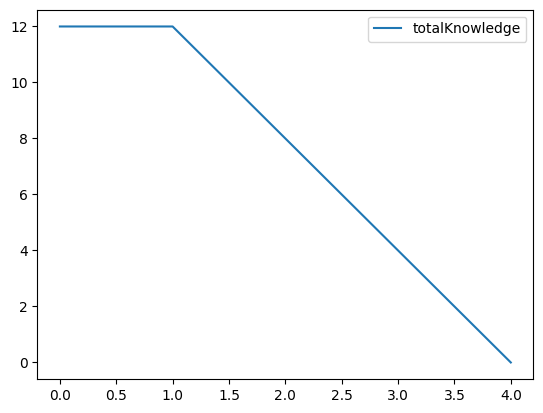

In [4]:
dataM = testmodel.datacollector.get_model_vars_dataframe()
dataM.plot()

In [5]:
dataA = testmodel.datacollector.get_agent_vars_dataframe()
dataA

knowledge_state
Step AgentID                
0    0             (1, 1, 1)
     1             (1, 1, 1)
     2             (1, 1, 1)
     3             (1, 1, 1)
1    0             (0, 1, 1)
     1             (0, 1, 1)
     2             (0, 1, 1)
     3             (0, 1, 1)
2    0             (0, 0, 1)
     1             (0, 0, 1)
     2             (0, 0, 1)
     3             (0, 0, 1)
3    0             (0, 0, 0)
     1             (0, 0, 0)
     2             (0, 0, 0)
     3             (0, 0, 0)